In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
DATA=data.copy()
DATA.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
DATA=DATA.rename(columns={'SepalLength':'LoS',
                     'SepalWidth':'LaS',
                     'PetalLength':'LoP',
                     'PetalWidth':'LaP',
                     'Name':'Nom'})
DATA.head(5)

,LoS,LaS,LoP,LaP,Nom
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
DATA.isnull().sum()

LoS    0
LaS    0
LoP    0
LaP    0
Nom    0
dtype: int64

In [7]:
DATA.shape

(150, 5)

In [8]:
len(DATA)-len(DATA.drop_duplicates())

3

In [9]:
DATA[DATA.duplicated()]

,LoS,LaS,LoP,LaP,Nom
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
Data=DATA.drop_duplicates(keep='first')

In [11]:
Data.shape

(147, 5)

In [12]:
len(Data)-len(Data.drop_duplicates())

0

Nous n'avons plus de doublons dans la nouvelle base de données

1) les données maquantes

2) les doublons

3) les données aberrantes


In [13]:
Nom_var=Data.columns
Nom_var

Index(['LoS', 'LaS', 'LoP', 'LaP', 'Nom'], dtype='object')

In [14]:
###Variables explicatives : variables exogènes
Xt=Data[Nom_var[0:4]]

####Variables expliquées : variables endogènes
yt=Data[Nom_var[4]]
yt.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Nom, dtype: object

In [15]:
##Déterminer les modalités des variables
yt.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|     :     |--------

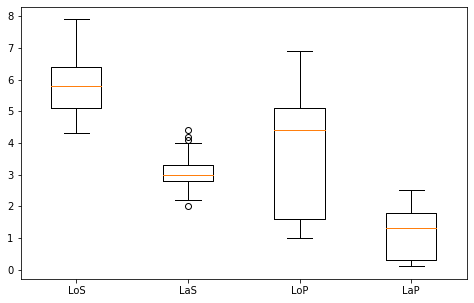

In [17]:
plt.figure(figsize=(8,5))
_=plt.boxplot(Data[Nom_var[0:4]],vert=True,labels=Nom_var[0:4])

In [18]:
T=sorted(Data[Nom_var[1]])
print(T[0],T[-3:])

2.0 [4.1, 4.2, 4.4]


In [19]:
seto=Data[yt=='Iris-setosa']
versi=Data[yt=='Iris-versicolor']
virgi=Data[yt=='Iris-virginica']
print(seto.shape[0],versi.shape[0],virgi.shape[0])

48 50 49


In [20]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

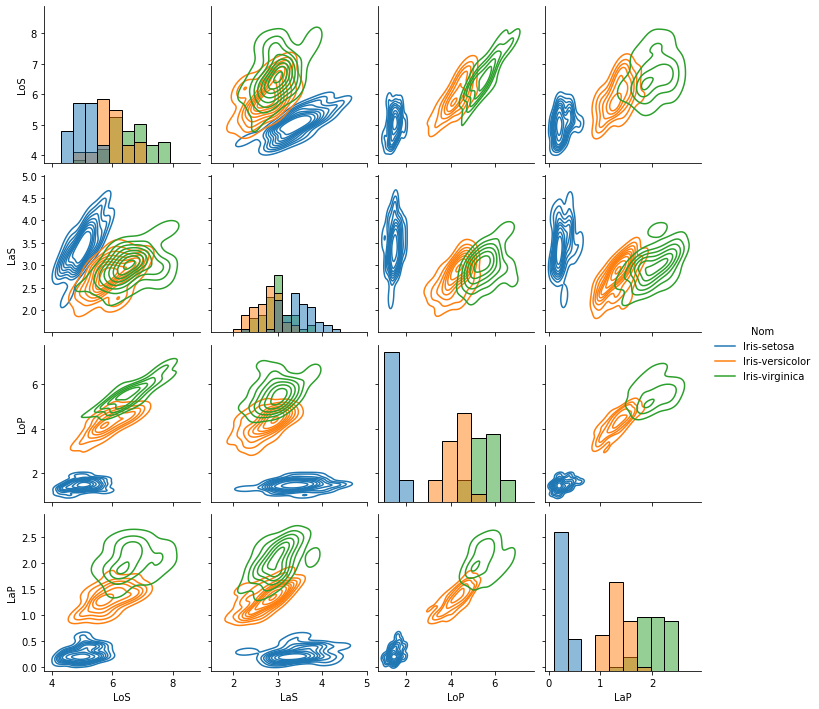

In [21]:
sns.pairplot(Data,hue='Nom',kind='kde',diag_kind='hist')
plt.show()

In [22]:
pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.4.2
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

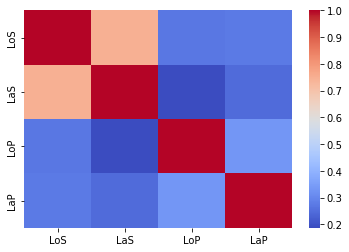

In [23]:
M_set=seto[Nom_var[0:4]].corr()


plt.figure()
sns.heatmap(M_set, cmap = 'coolwarm')
plt.show()

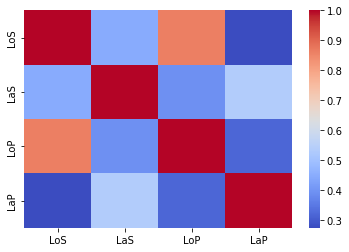

In [24]:
M_virgi=virgi[Nom_var[0:4]].corr()
plt.figure()
sns.heatmap(M_virgi, cmap = 'coolwarm')
plt.show()

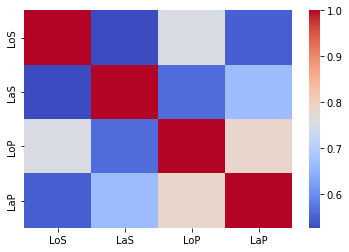

In [25]:
M_versi=versi[Nom_var[0:4]].corr()
plt.figure()
sns.heatmap(M_versi, cmap = 'coolwarm')
plt.show()

In [26]:
pearsonr(seto['LaS'],seto['LoP'])[1]*100

20.3091662413558

In [27]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],pearsonr(seto[Nom_var[i]],seto[Nom_var[j]])[1]*100)

#pearsonr(seto[Nom_var[0]],seto[Nom_var[1]])

LoS LaS 9.418675838382009e-08
LoS LoP 6.62738344304898
LoS LaP 6.036193580174612
LaS LoP 20.3091662413558
LaS LaP 9.268606237531836
LoP LaP 2.139049723489791


In [34]:
help(spearmanr)

Help on function spearmanr in module scipy.stats.stats:

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate a Spearman correlation coefficient with associated p-value.
    
    The Spearman rank-order correlation coefficient is a nonparametric measure
    of the monotonicity of the relationship between two datasets. Unlike the
    Pearson correlation, the Spearman correlation does not assume that both
    datasets are normally distributed. Like other correlation coefficients,
    this one varies between -1 and +1 with 0 implying no correlation.
    Correlations of -1 or +1 imply an exact monotonic relationship. Positive
    correlations imply that as x increases, so does y. Negative correlations
    imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. The p-va

In [36]:
spearmanr(seto['LoS'],seto['LaS']).pvalue

1.5615114500396913e-10

In [37]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],spearmanr(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)

LoS LaS 1.5615114500396914e-08
LoS LoP 5.49257254711206
LoS LaP 5.042749937047617
LaS LoP 18.10092359400578
LaS LaP 2.7033338514530287
LoP LaP 6.361609221150967


In [38]:
help(kendalltau)

Help on function kendalltau in module scipy.stats.stats:

kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b')
    Calculate Kendall's tau, a correlation measure for ordinal data.
    
    Kendall's tau is a measure of the correspondence between two rankings.
    Values close to 1 indicate strong agreement, and values close to -1
    indicate strong disagreement. This implements two variants of Kendall's
    tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
    differ only in how they are normalized to lie within the range -1 to 1;
    the hypothesis tests (their p-values) are identical. Kendall's original
    tau-a is not implemented separately because both tau-b and tau-c reduce
    to tau-a in the absence of ties.
    
    Parameters
    ----------
    x, y : array_like
        Arrays of rankings, of the same shape. If arrays are not 1-D, they
        will be flattened to 1-D.
    initial_lexsort : bool, optional
        U

In [40]:
kendalltau(seto['LoS'],seto['LaS']).pvalue

9.753042446800271e-09

In [41]:
for i in range(0,3):
    for j in range(i+1,4):
        print(Nom_var[i],Nom_var[j],kendalltau(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)

LoS LaS 9.75304244680027e-07
LoS LoP 5.152908154261244
LoS LaP 5.70916125475979
LaS LoP 16.46903274950938
LaS LaP 2.4133613069139783
LoP LaP 6.633057542133787


In [46]:
pear=[]
spea=[]
kend=[]
for i in range(0,3):
    for j in range(i+1,4):
        pear.append(pearsonr(seto[Nom_var[i]],seto[Nom_var[j]])[1]*100)
        spea.append(spearmanr(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)
        kend.append(kendalltau(seto[Nom_var[i]],seto[Nom_var[j]]).pvalue*100)
        
Dt=pd.DataFrame({
    'pvalue_pearson':pear,
    'pvalue_spearman': spea,
    'pvalue_kendall':kend
})
Dt

,pvalue_pearson,pvalue_spearman,pvalue_kendall
0,9.418676e-08,1.561511e-08,9.753042e-07
1,6.627383e+00,5.492573e+00,5.152908e+00
2,6.036194e+00,5.042750e+00,5.709161e+00
3,2.030917e+01,1.810092e+01,1.646903e+01
4,9.268606e+00,2.703334e+00,2.413361e+00
5,2.139050e+00,6.361609e+00,6.633058e+00
